In [16]:
import os
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [17]:
filepath = '/Users/evansweeney/Desktop/492_project_local/cmse492_project/data/processed/USW00013985_filtered.csv'
df = pd.read_csv(filepath)
df.head()

,Year,Month,Day,Hour,Minute,Latitude,Longitude,Elevation,temperature,dew_point_temperature,station_level_pressure,sea_level_pressure,wind_gust,precipitation,relative_humidity,wet_bulb_temperature,Wx,Wy
0,2015,1,1,0,0,37.7608,-99.9689,814.1,-10.6,-16.1,935.1,1032.5,NaN,NaN,64.0,-11.9,-0.625133,-3.545308
1,2015,1,1,0,52,37.7608,-99.9689,814.1,-10.6,-15.6,934.6,1032.2,NaN,0.0,67.0,-11.7,-0.538309,-3.052904
2,2015,1,1,1,52,37.7608,-99.9689,814.1,-10.6,-15.0,934.3,1031.5,NaN,0.0,70.0,-11.6,-1.300000,-2.251666
3,2015,1,1,2,52,37.7608,-99.9689,814.1,-11.1,-15.6,934.3,1031.8,NaN,0.0,70.0,-12.2,-1.050000,-1.818653
4,2015,1,1,3,0,37.7608,-99.9689,814.1,-11.1,-15.6,934.5,1031.8,NaN,NaN,70.0,-12.2,-1.050000,-1.818653


In [20]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,14163.0,2015.000000,0.000000e+00,2015.000000,2015.000000,2.015000e+03,2015.000000,2015.0000
Month,14163.0,6.529055,3.426110e+00,1.000000,4.000000,6.000000e+00,10.000000,12.0000
Day,14163.0,16.070324,8.818255e+00,1.000000,8.000000,1.600000e+01,24.000000,31.0000
Hour,14163.0,11.266540,6.801370e+00,0.000000,6.000000,1.200000e+01,17.000000,23.0000
Minute,14163.0,37.135070,2.193951e+01,0.000000,14.000000,5.200000e+01,52.000000,59.0000
Latitude,14163.0,37.760800,1.421136e-14,37.760800,37.760800,3.776080e+01,37.760800,37.7608
Longitude,14163.0,-99.968900,1.421136e-14,-99.968900,-99.968900,-9.996890e+01,-99.968900,-99.9689
Elevation,14163.0,814.100000,3.410726e-13,814.100000,814.100000,8.141000e+02,814.100000,814.1000
temperature,14153.0,12.606112,1.124643e+01,-16.700000,4.400000,1.390000e+01,21.100000,40.0000
dew_point_temperature,14153.0,5.208224,9.778595e+00,-20.600000,-2.800000,6.100000e+00,13.900000,22.2000


In [13]:
print(df[['Wx', 'Wy']].isna().sum())


Wx    67
Wy    67
dtype: int64


In [14]:
df = df.dropna(subset=['Wx', 'Wy'])


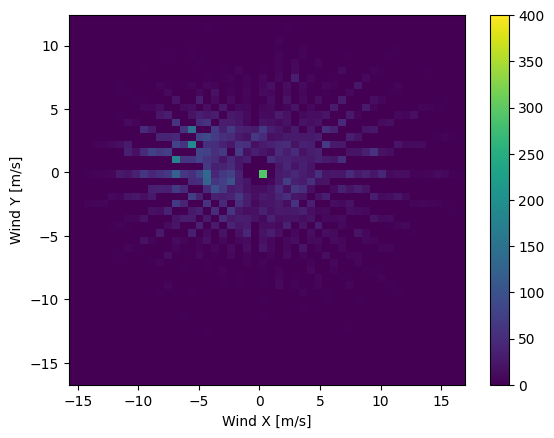

In [15]:
import matplotlib.pyplot as plt

plt.hist2d(df['Wx'], df['Wy'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')
plt.show()
